<a id='2'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Explore</b>

In [63]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis,
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)

# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

In [64]:
df = pd.read_csv('/content/ai4i2020.csv')
# df = pd.read_csv('ai4i2020.csv')

First up is just to eyeball the data. It seems that there are two indices: the index and ProductID. We can drop those. There is a Type which is categorical and the remainder are numeric. The last five feastures are all failure modes, so they will not be evaluated in this notebook.

In [65]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


There are no apparent missing values, but we'll check these out carefully to make sure

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [67]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UDI,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
Product ID,10000,10000,L57163,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10000,3,L,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature [K],10000.0,NaN,NaN,NaN,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,NaN,NaN,NaN,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,NaN,NaN,NaN,1538.7761,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,NaN,NaN,NaN,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,NaN,NaN,NaN,107.951,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,NaN,NaN,NaN,0.0339,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,NaN,NaN,NaN,0.0046,0.067671,0.0,0.0,0.0,0.0,1.0


making sure that there are no missing values hidden as a question mark

In [68]:
df.replace("?",np.nan,inplace=True)

turn all columns into float to make processing later easier

In [69]:
for column in df.columns:
    try:
        df[column]=df[column].astype(float)
    except:
        pass

just check the descriptions for the numeric features. None missing and on apparent outliers

In [70]:
# show the numeric characters
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.00,0.0,0.00,1.0


Another verification whether there are any missing features. I see none.

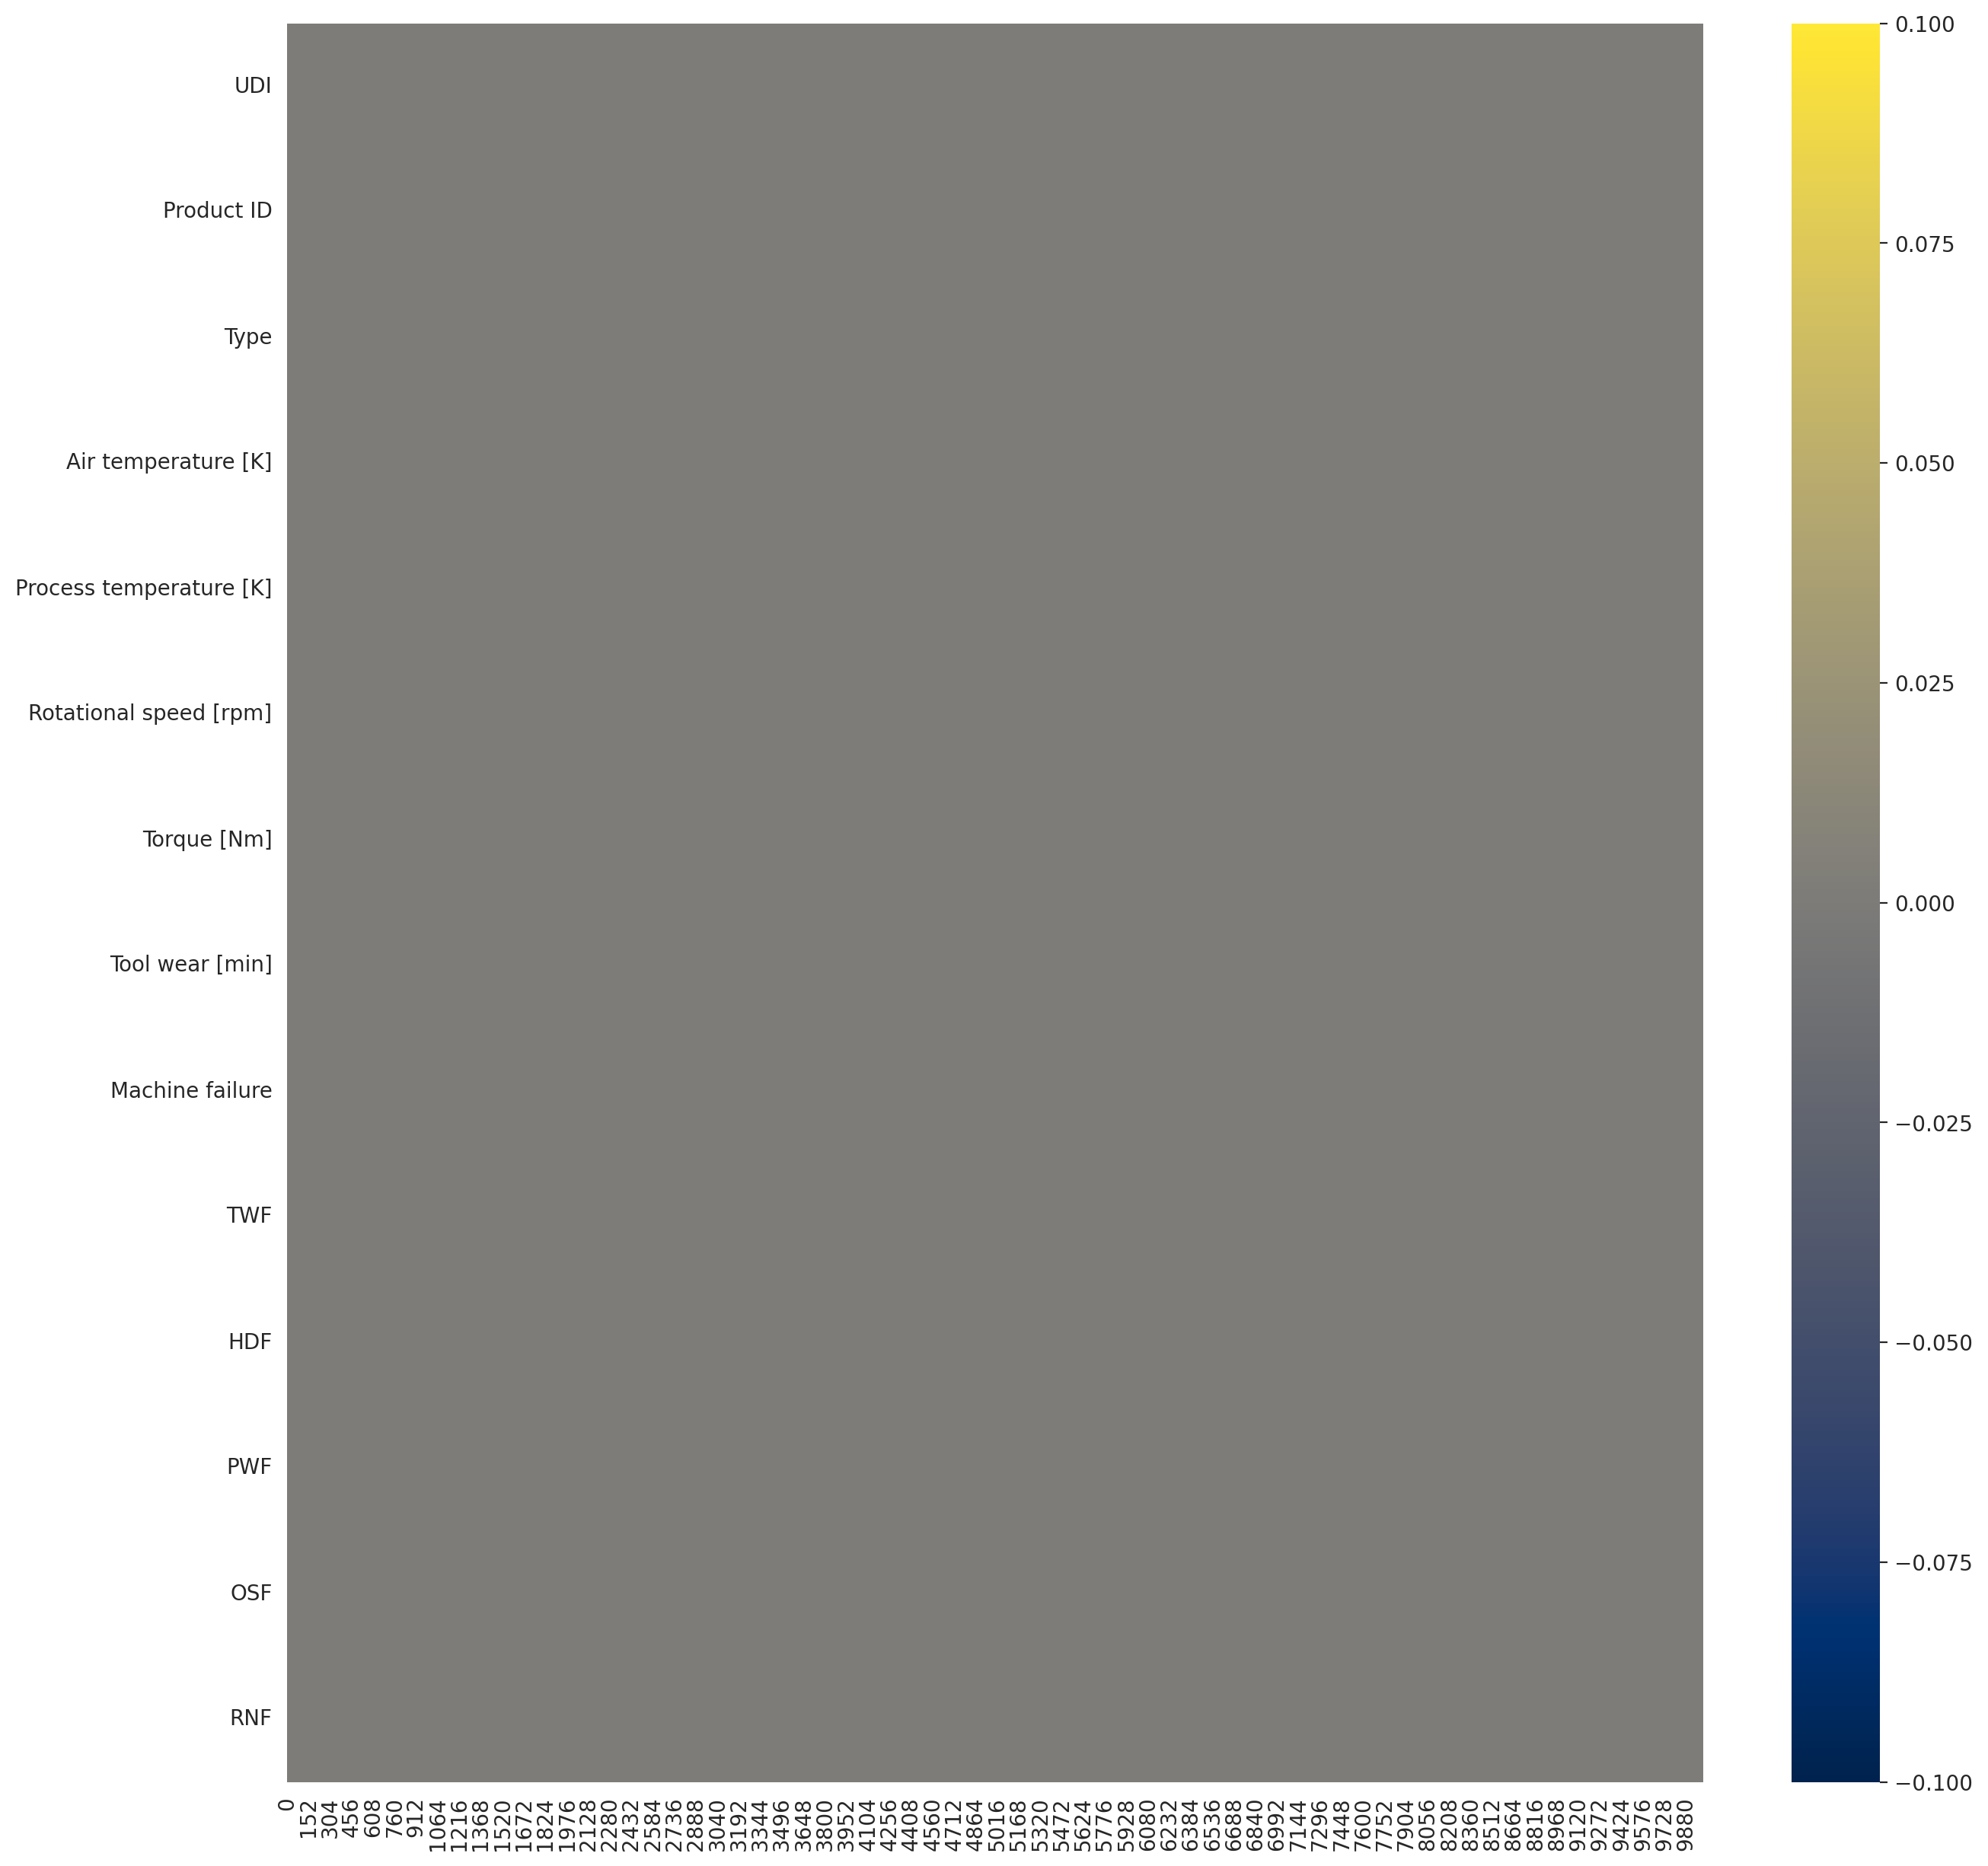

In [71]:
plt.figure(figsize=(15,15))
plot_kws={"s": 1}
sns.heatmap(df.isna().transpose(),
            cmap='cividis',
            linewidths=0.0,
           ).set_facecolor('white')

There are strongly correlated features namely process and air temperature. Torque and rotational speed are also strongly correlated. We can drop one of the temperatures, but the torque to rotational speed difference might be a indication of a failure, so we'll keep both.  

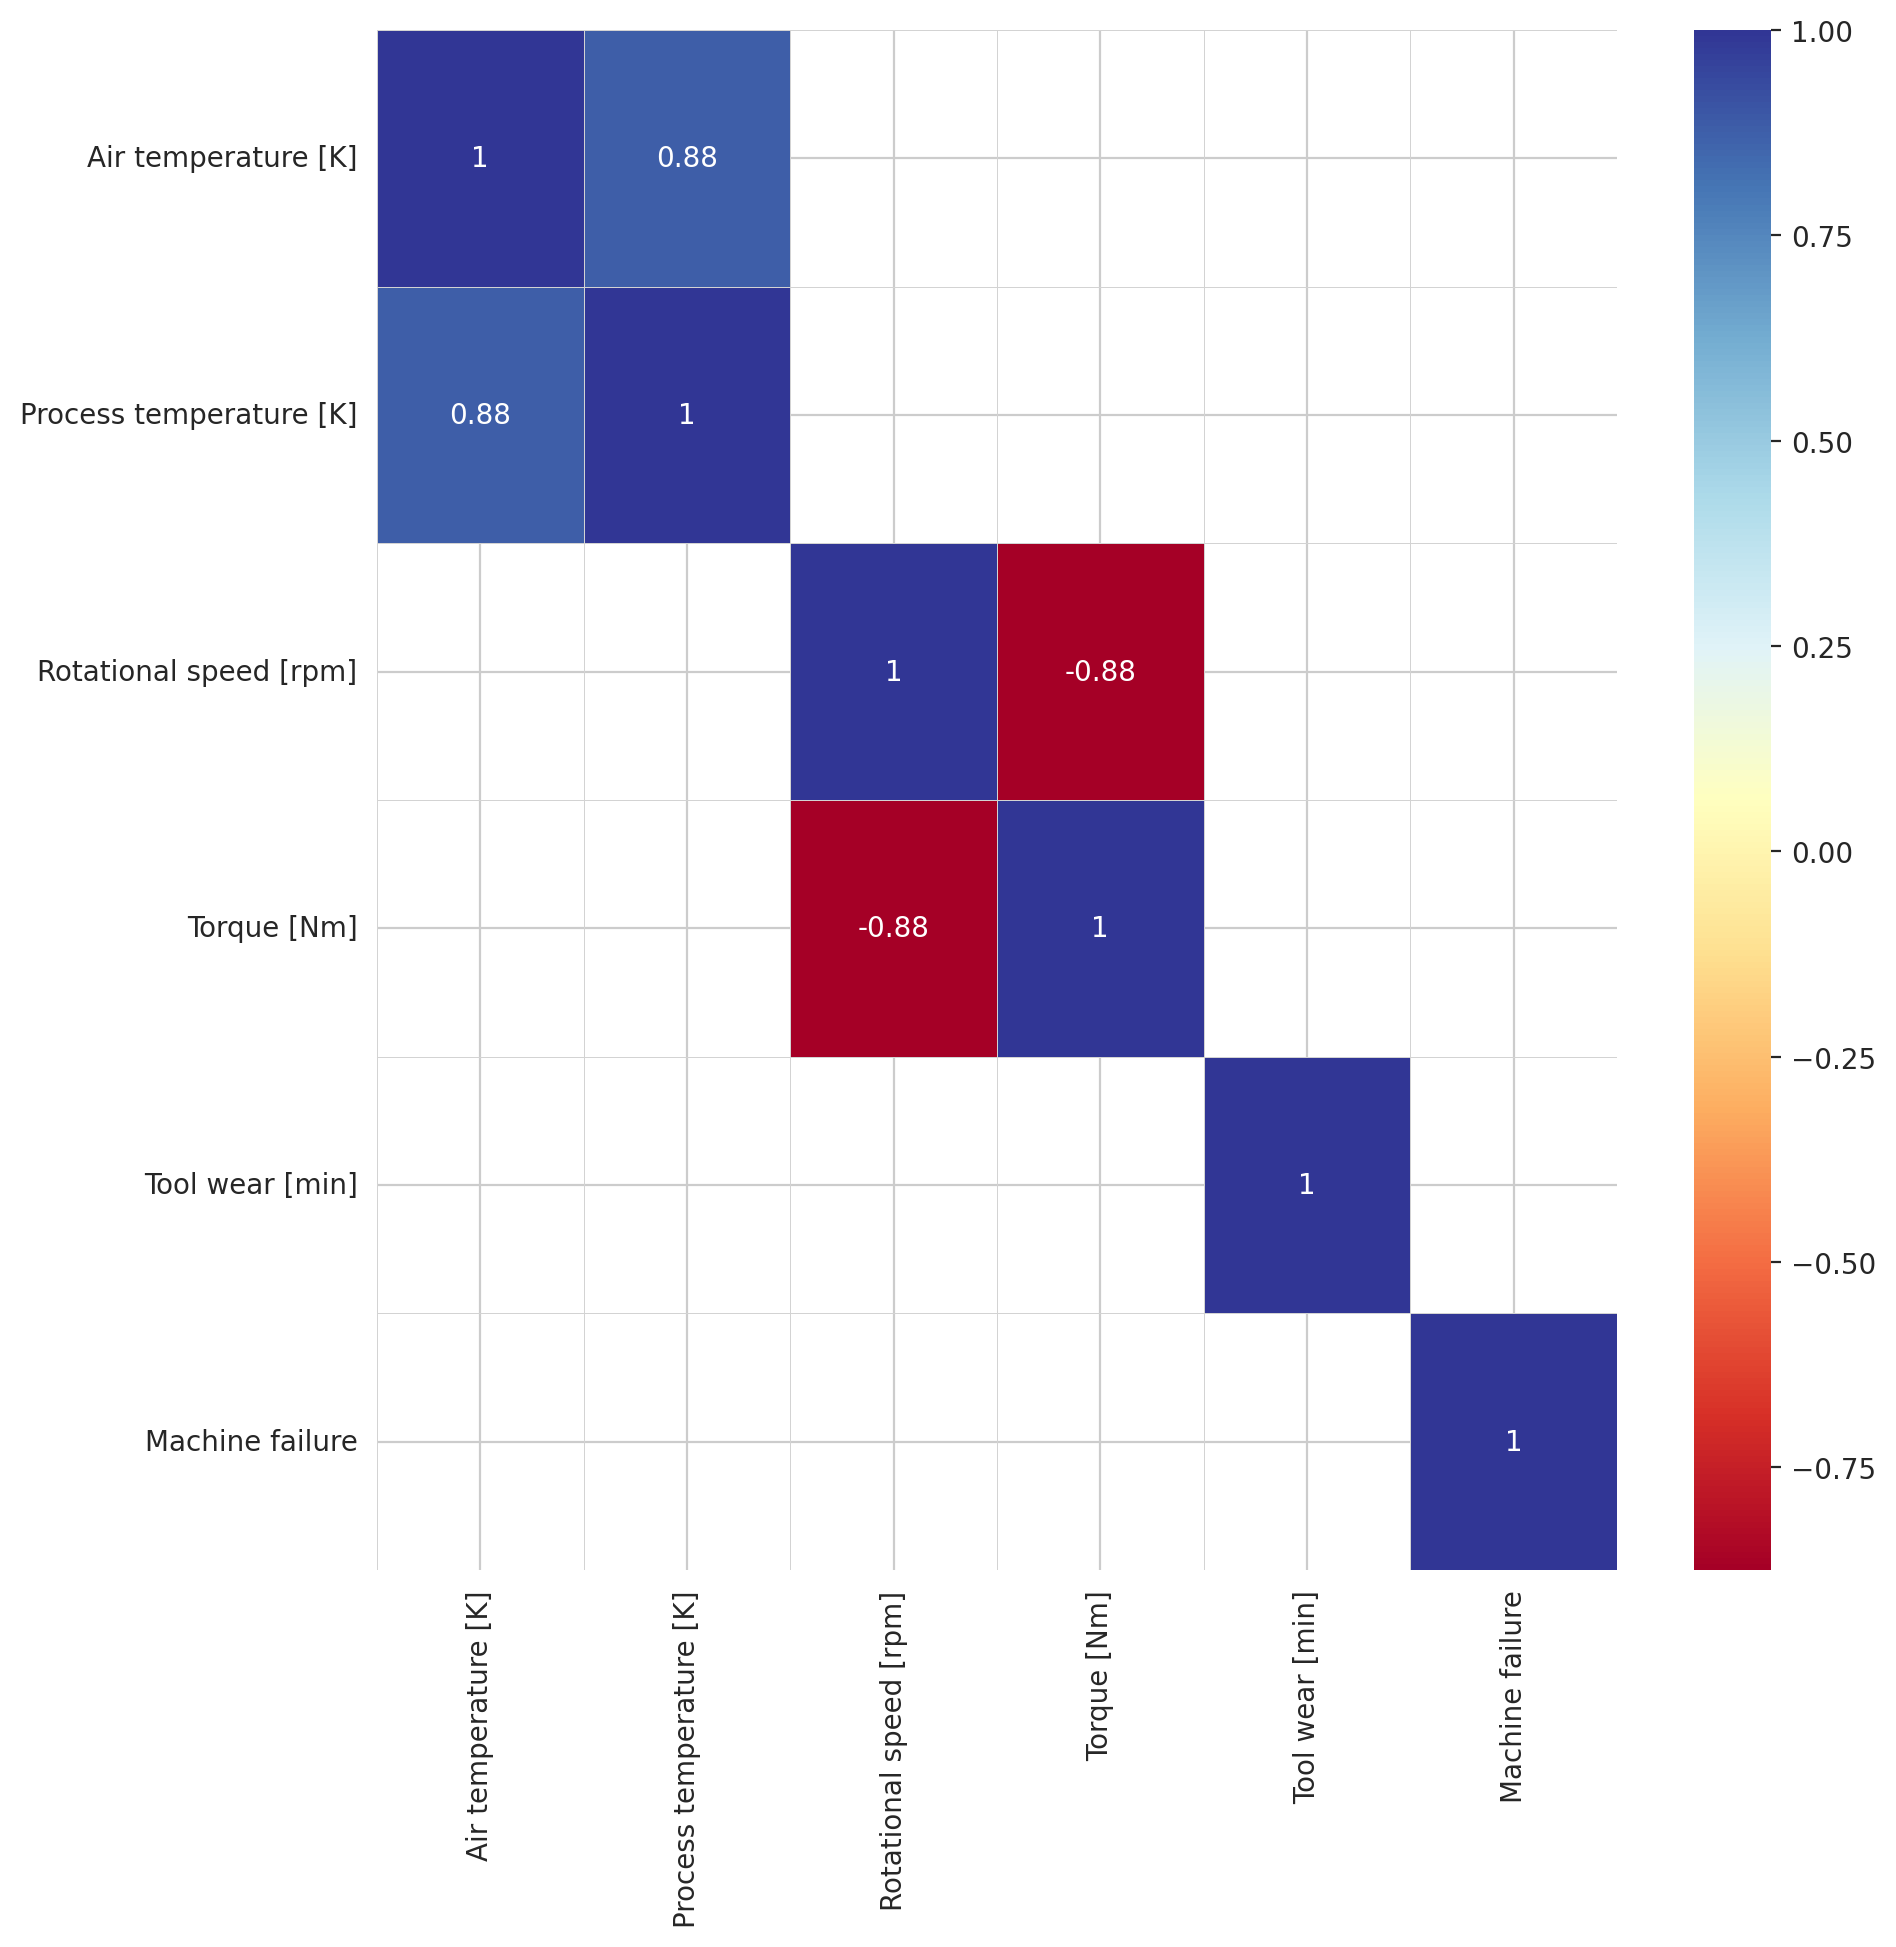

In [72]:
plt.figure(figsize=(10,10))
threshold = 0.80
sns.set_style("whitegrid", {"axes.facecolor": ".0"})

# Drop non-numeric columns before calculating correlation
df_numeric_corr = df.drop(['UDI', 'Product ID', 'Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)

df_cluster2 = df_numeric_corr.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')
plt.show()

The profiling report follows to look for outliers, missing values, and distributions. We can see that the data is imbalanced.

In [73]:
# %%time
# profile = ProfileReport(df,
#                         title="Predictive Maintenance",
#                         dataset={"description": "This profiling report was generated for Carl Kirstein",
#                                  "copyright_holder": "Carl Kirstein",
#                                  "copyright_year": "2022",
#                                 },
#                         explorative=True,
#                        )
# profile

Drop the indices as these have no predictive power

In [74]:
df.drop(['UDI','Product ID'],axis=1,inplace=True)

Drop the failure modes, as we're only interested whether something is a failure. I guess that you'll build a model for each failure mode if it comes down to that.

In [75]:
df.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1,inplace=True)

Drop the type, as this dominates too strongly on type = L.

In [76]:
df.drop(['Type'],axis=1,inplace=True)

The remaining features

In [77]:
list(df)

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure']

turn categorical information into numeric

In [78]:
df = pd.get_dummies(df,drop_first=True)

In [79]:
features = list(df.columns)

In [80]:
for feature in features:
    print(feature + " - " + str(len(df[df[feature].isna()])))

Air temperature [K] - 0
Process temperature [K] - 0
Rotational speed [rpm] - 0
Torque [Nm] - 0
Tool wear [min] - 0
Machine failure - 0


Just another confirmation of how badly imbalanced the data is. We'll need to oversample in this case to get a better prediction.

In [81]:
df_group = df.groupby(['Machine failure'])
df_group.count()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Machine failure,,,,,
0.0,9661,9661,9661,9661,9661
1.0,339,339,339,339,339


In [82]:
df[df['Machine failure'].isna()]

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure


<a id='3'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Pre-processing and Feature Selection</b>

replace the missing numeric values with the mean

In [83]:
df_numeric.fillna(df_numeric.mean(),inplace=True)

for feature in features:
    try:
        df[feature].fillna(df[feature].mean(),inplace=True)
    except:
        try:
            df[feature].fillna(df[feature].mode(),inplace=True)
        except:
            pass

In [84]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0


Perform a statistical univariate test to determine the best features. Product type L dominates this strongly.

In [85]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

# fig = go.Figure(go.Bar(
#             x=feature_score['score'][0:21],
#             y=feature_score['feature'][0:21],
#             orientation='h'))

# fig.update_layout(title="Top 20 Features",
#                   height=1200,
#                   showlegend=False,
#                  )

# fig.show()

In [86]:
# awesome bit of code from https://www.kaggle.com/code/adibouayjan/house-price-step-by-step-modeling

Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list=[], threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X, y)


Selected Features:
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


In [87]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [88]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(10000, 5)

In [89]:
np.shape(X)

(10000, 5)

In [90]:
len(feature_names)

5

<a id='4'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Modelling and Evaluation</b>

In [91]:
# import library
from imblearn.over_sampling import SMOTE, SVMSMOTE,RandomOverSampler
oversamp = RandomOverSampler(random_state=0)
# oversamp = SMOTE(n_jobs=-1)

In [92]:
y.value_counts()

,count
Machine failure,
0.0,9661
1.0,339


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify=y)
# X_train,y_train = oversamp.fit_resample(X_train, y_train)

In [94]:
y_train.value_counts()

,count
Machine failure,
0.0,7729
1.0,271


There are no distinct outliers, therefore a simple minmax scaler suffices.

In [95]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [96]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,roc_auc_score, matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay
import time
model_performance = pd.DataFrame(columns=['Accuracy','F1-Score','MCC score','time to train','time to predict','total time'])

<a id='4_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Logistical Classification</b>

In [97]:
%%time
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 36.6 ms, sys: 2.99 ms, total: 39.6 ms
Wall time: 24.8 ms


In [98]:
accuracy = accuracy_score(y_test, y_predictions)
f1s = f1_score(y_test, y_predictions, average='macro')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='macro' )

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy,f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 96.60%
F1-Score: 49.14%
MCC: 0.00%
ROC AUC score: 88.54%
time to train: 0.02 s
time to predict: 0.00 s
total: 0.02 s


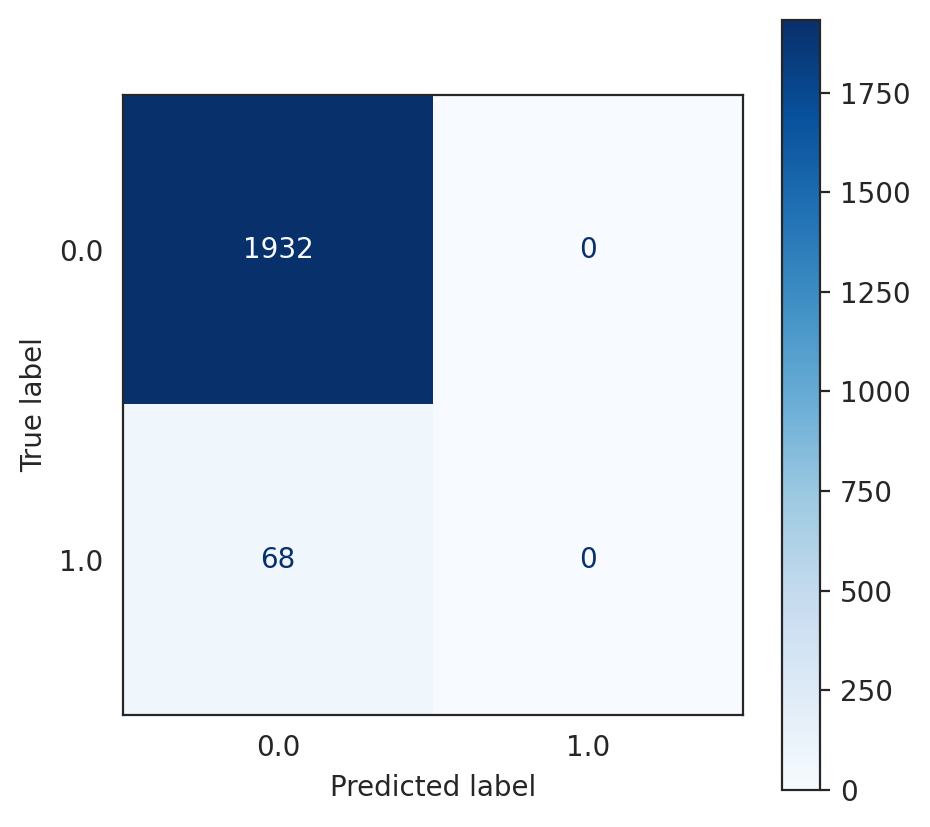

In [99]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
# Use ConfusionMatrixDisplay.from_estimator to plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

<a id='4_3'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Decision Tree</b>

In [100]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 34.1 ms, sys: 1.91 ms, total: 36 ms
Wall time: 36.3 ms


In [101]:
accuracy = accuracy_score(y_test, y_predictions)
f1s = f1_score(y_test, y_predictions, average='macro')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='macro')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 98.00%
F1-Score: 84.33%
MCC: 68.70%
ROC AUC score: 83.36%
time to train: 0.04 s
time to predict: 0.00 s
total: 0.04 s


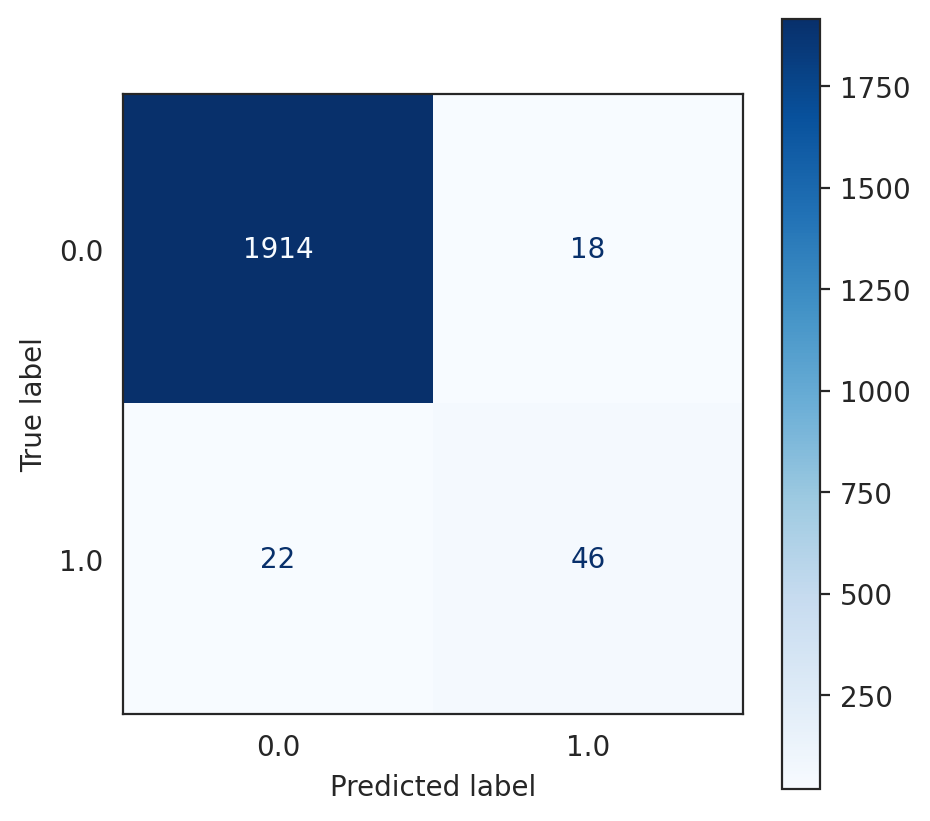

In [102]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
# Use ConfusionMatrixDisplay.from_estimator to plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

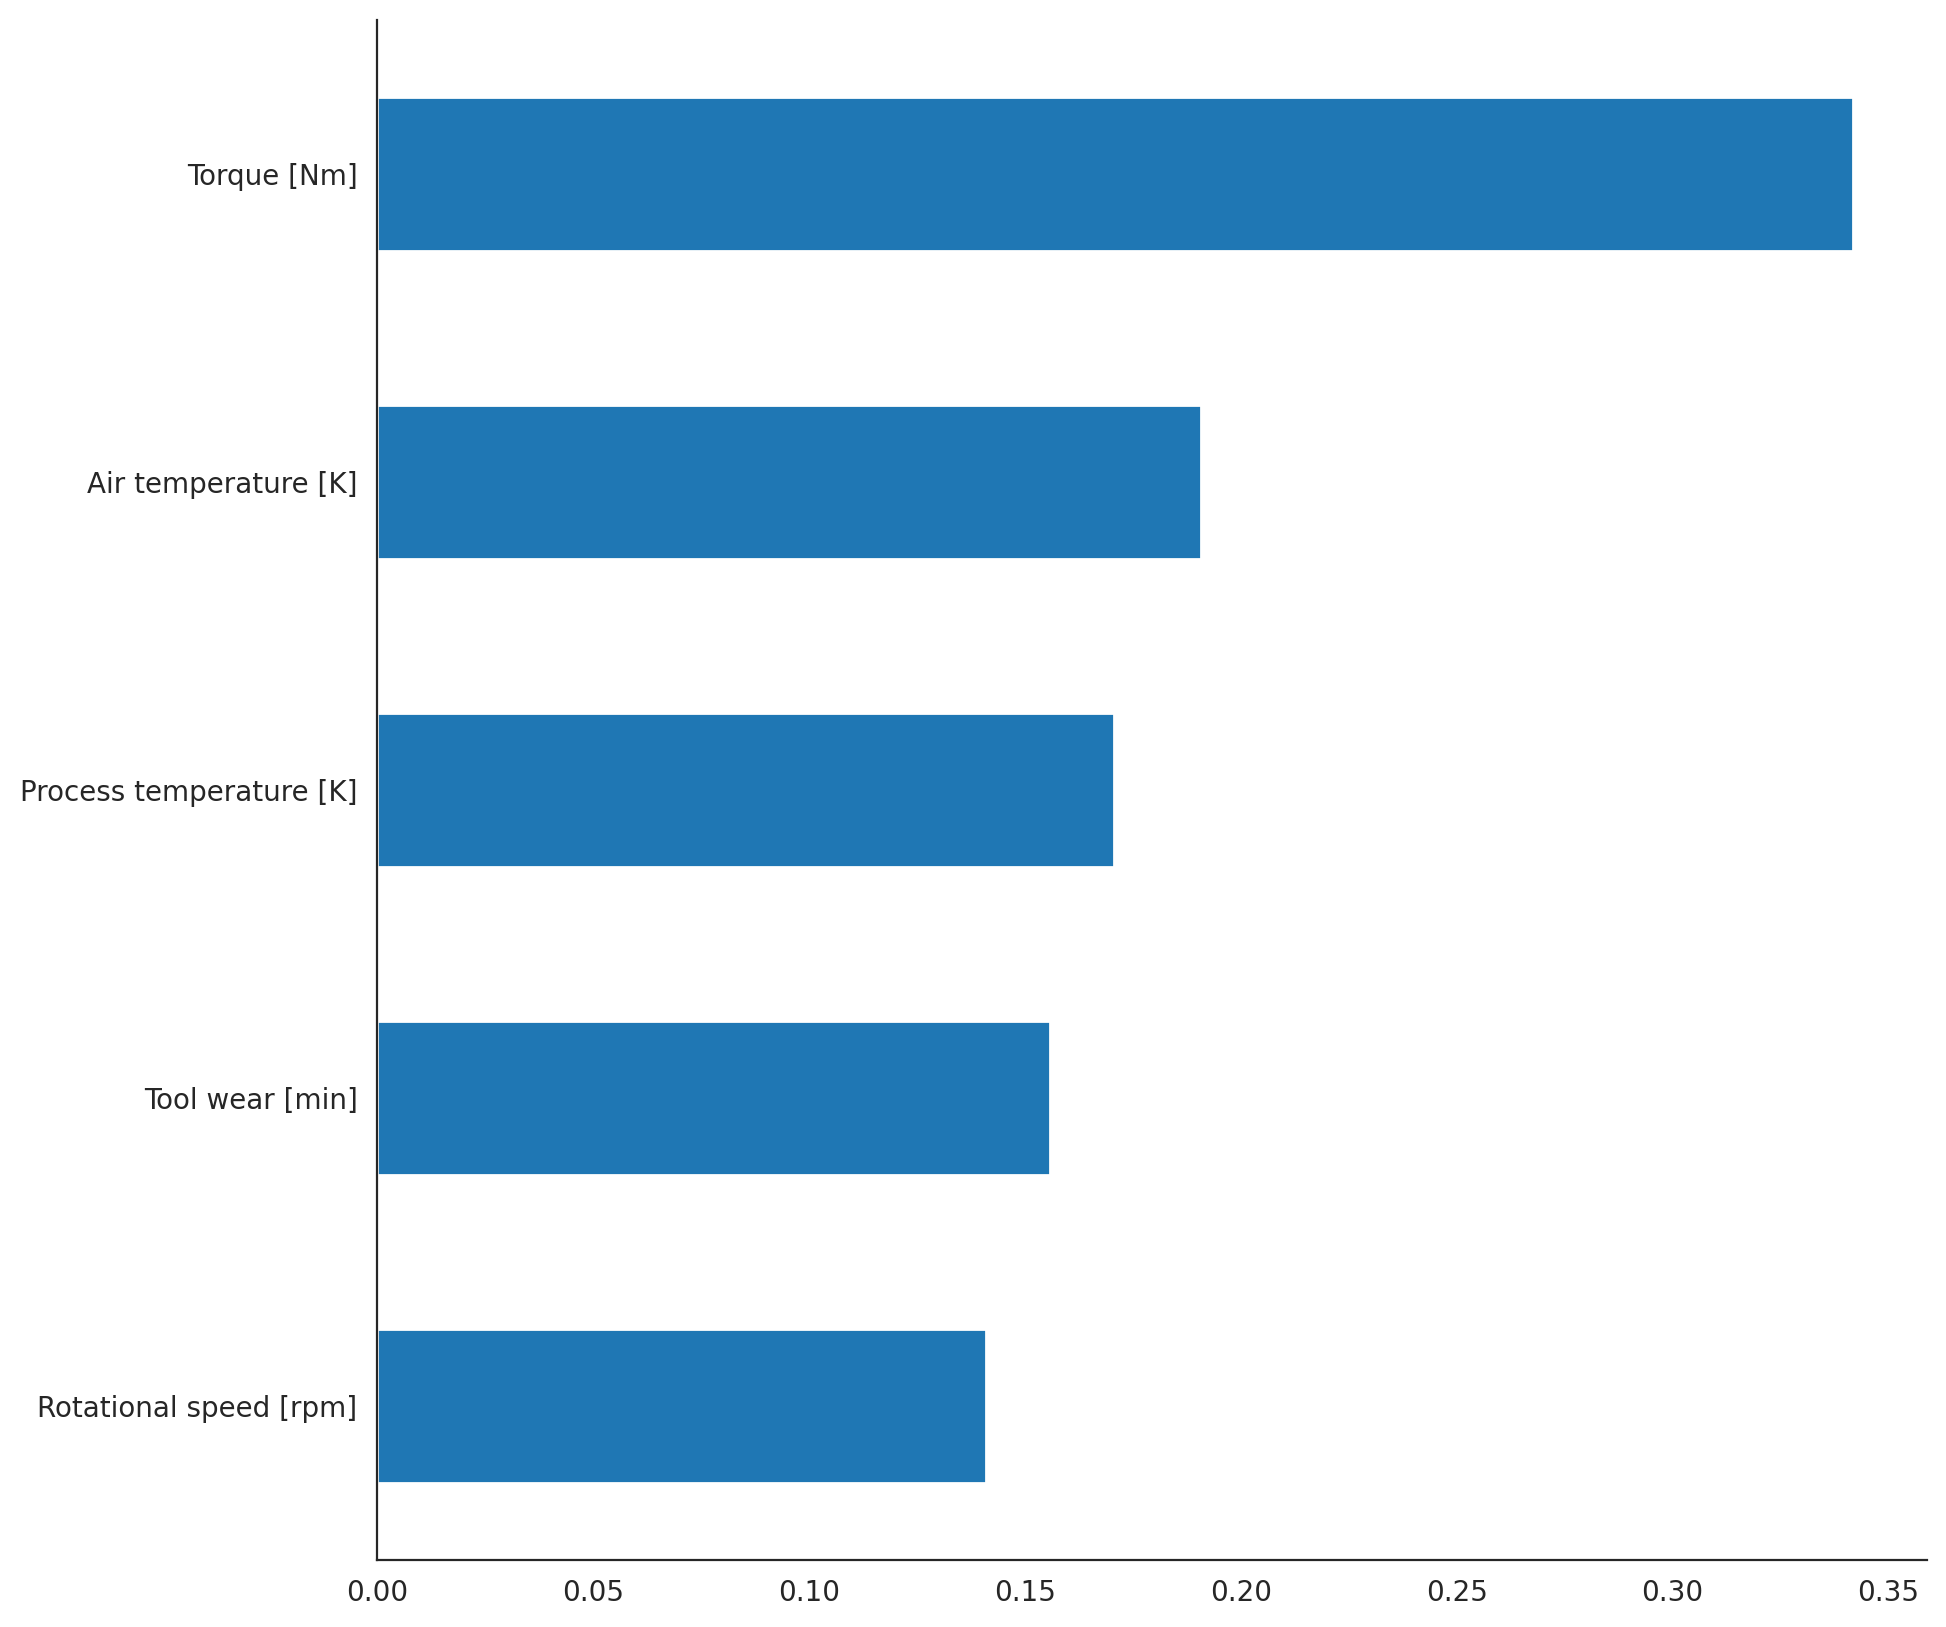

In [103]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

<a id='4_5'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Random Forest</b>

In [104]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 1.43 s, sys: 20.9 ms, total: 1.45 s
Wall time: 839 ms


In [105]:
accuracy = accuracy_score(y_test, y_predictions)
f1s = f1_score(y_test, y_predictions, average='macro')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='macro')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 98.55%
F1-Score: 87.23%
MCC: 75.55%
ROC AUC score: 95.42%
time to train: 0.80 s
time to predict: 0.03 s
total: 0.84 s


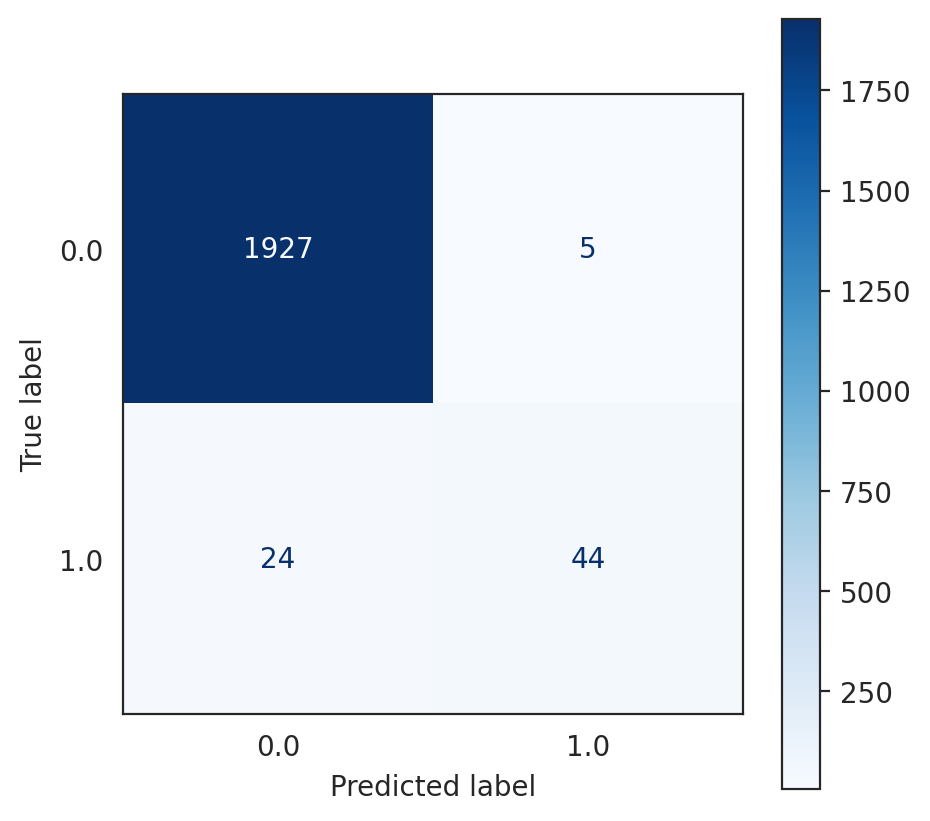

In [106]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
# Use ConfusionMatrixDisplay.from_estimator to plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

<a id='4_6'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Gradient Boosting Classifier</b>

In [107]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 1.01 s, sys: 2 ms, total: 1.01 s
Wall time: 1.01 s


In [108]:
accuracy = accuracy_score(y_test, y_predictions)
f1s = f1_score(y_test, y_predictions, average='macro')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='macro')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='macro')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Gradient Boosting Classifier'] = [accuracy, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 98.60%
F1-Score: 87.36%
MCC: 76.26%
ROC AUC score: 96.50%
time to train: 1.01 s
time to predict: 0.00 s
total: 1.01 s


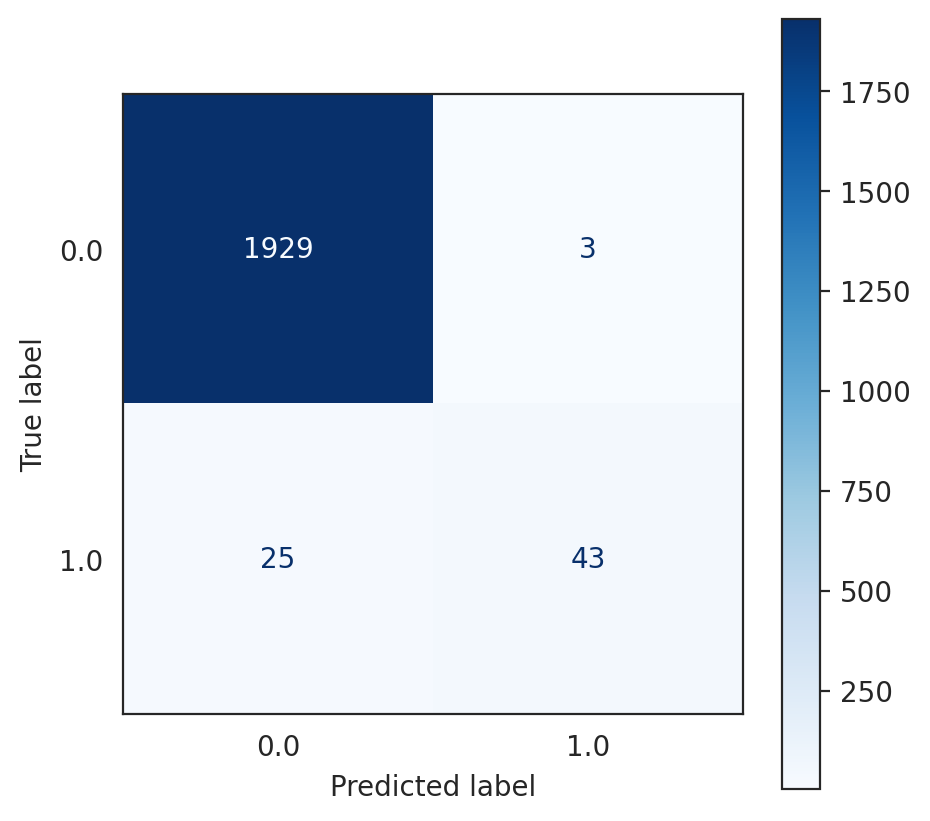

In [109]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
# Use ConfusionMatrixDisplay.from_estimator to plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

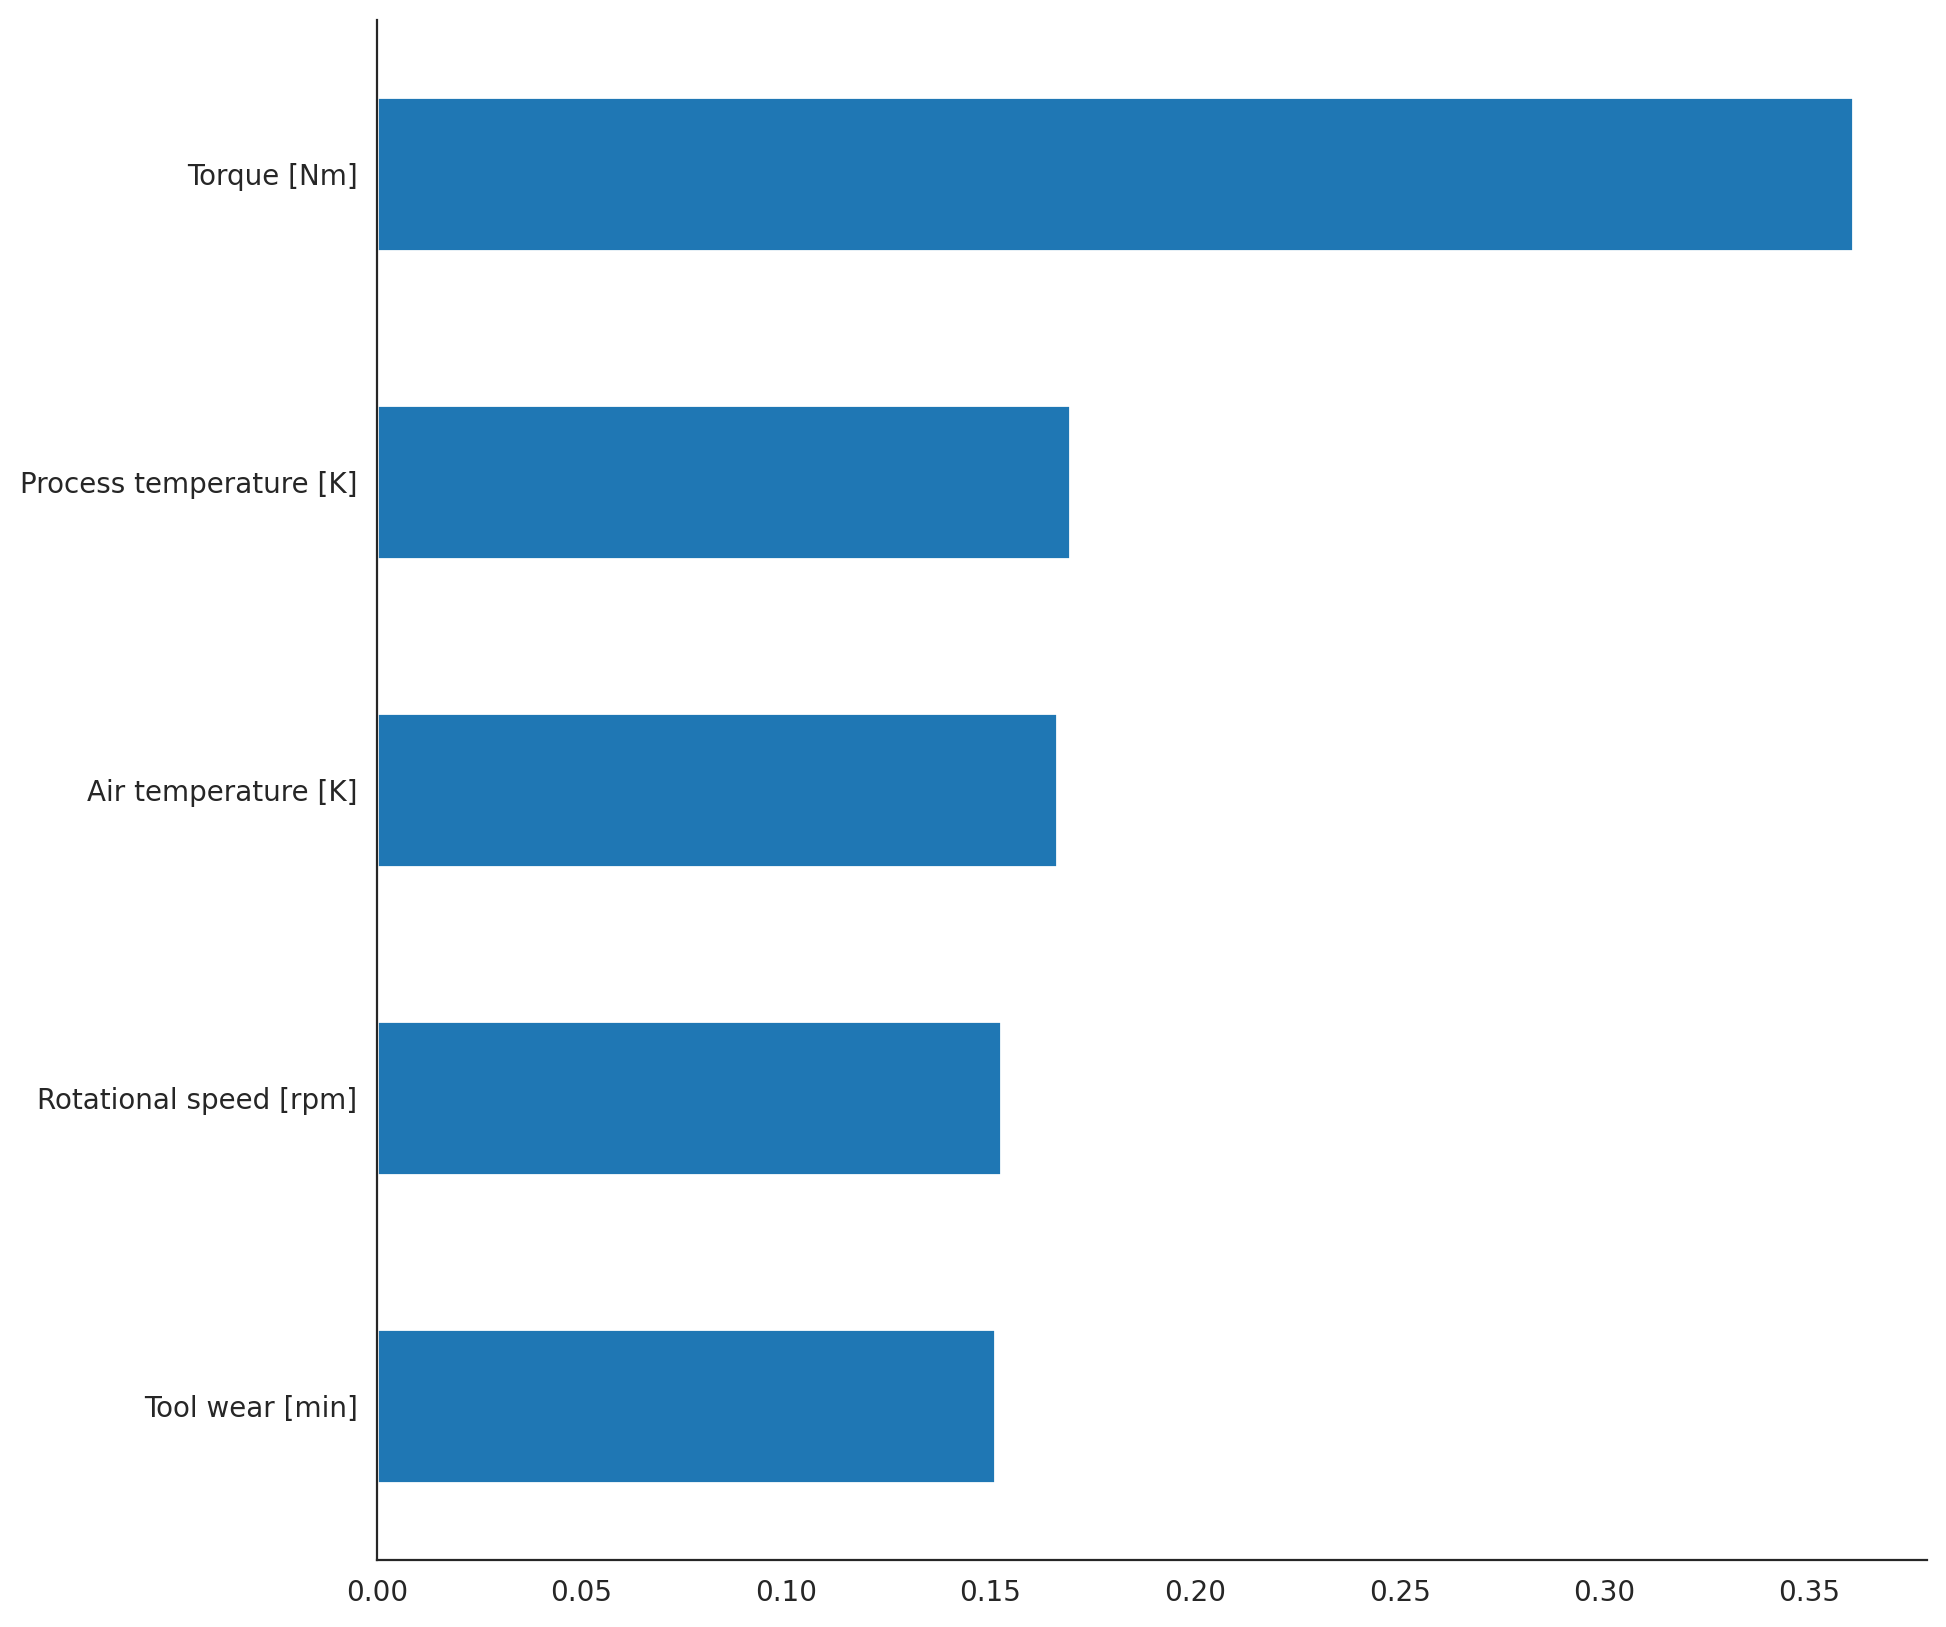

In [110]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

<a id='4_7'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Neural Network MLP</b>

In [111]:
%%time
from sklearn.neural_network import MLPClassifier
start = time.time()
model = MLPClassifier(hidden_layer_sizes = (100,100,),
                      activation='relu',
                      solver='adam',
                      batch_size=2000,
                      verbose=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 22.2 s, sys: 37 ms, total: 22.3 s
Wall time: 14.4 s


In [112]:
accuracy = accuracy_score(y_test, y_predictions)
f1s = f1_score(y_test, y_predictions, average='macro')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='macro')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='macro')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Neural Network MLP'] = [accuracy, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 97.25%
F1-Score: 72.07%
MCC: 47.38%
ROC AUC score: 95.16%
time to train: 14.35 s
time to predict: 0.00 s
total: 14.36 s


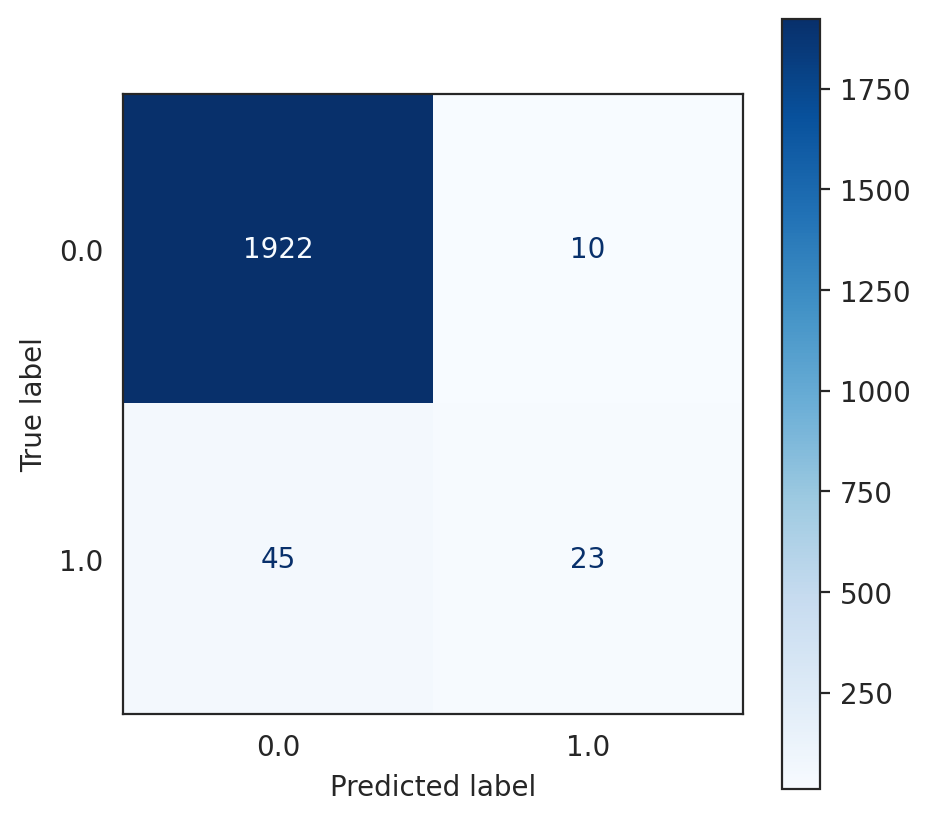

In [113]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
# Use ConfusionMatrixDisplay.from_estimator to plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

XGBoost

XGBoost Performance:
Accuracy: 98.50%
F1-Score (Macro): 87.11%
MCC: 74.95%
ROC AUC score (Macro): 97.51%
time to train: 0.15 s
time to predict: 0.01 s
total: 0.16 s


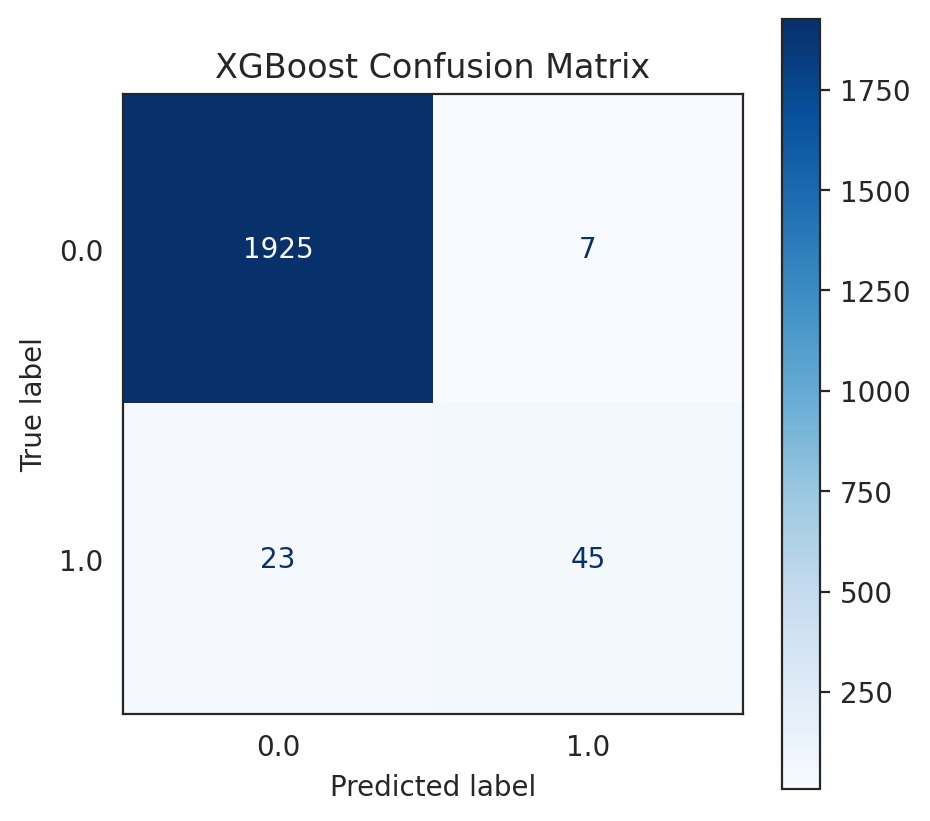

In [211]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, roc_auc_score
import time

# Train XGBoost model
start = time.time()
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_model.fit(X_train, y_train)
end_train = time.time()

# Make predictions
y_predictions = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
end_predict = time.time()

# Evaluate performance
accuracy = accuracy_score(y_test, y_predictions)
f1s = f1_score(y_test, y_predictions, average='macro')
MCC = matthews_corrcoef(y_test, y_predictions)
ROC_AUC = roc_auc_score(y_test, y_pred_prob, average='macro')

print("XGBoost Performance:")
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("F1-Score (Macro): "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score (Macro): "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")

# Add performance to model_performance DataFrame
# Assuming model_performance DataFrame has columns ['Accuracy','F1-Score','MCC score','time to train','time to predict','total time']
# Note: XGBoost metrics here are using 'macro' average for F1 and ROC AUC as requested in previous tasks.
# Adjust if you want 'weighted' or other averages.
model_performance.loc['XGBoost'] = [accuracy, f1s, MCC, end_train - start, end_predict - end_train, end_predict - start]

# Optional: Plot confusion matrix
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, cmap=plt.cm.Blues)
plt.title("XGBoost Confusion Matrix")
plt.show()

[LightGBM] [Info] Number of positive: 271, number of negative: 7729
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033875 -> initscore=-3.350616
[LightGBM] [Info] Start training from score -3.350616
LightGBM Performance:
Accuracy: 98.70%
F1-Score (Macro): 89.18%
MCC: 78.76%
ROC AUC score (Macro): 98.07%
time to train: 0.17 s
time to predict: 0.05 s
total: 0.21 s


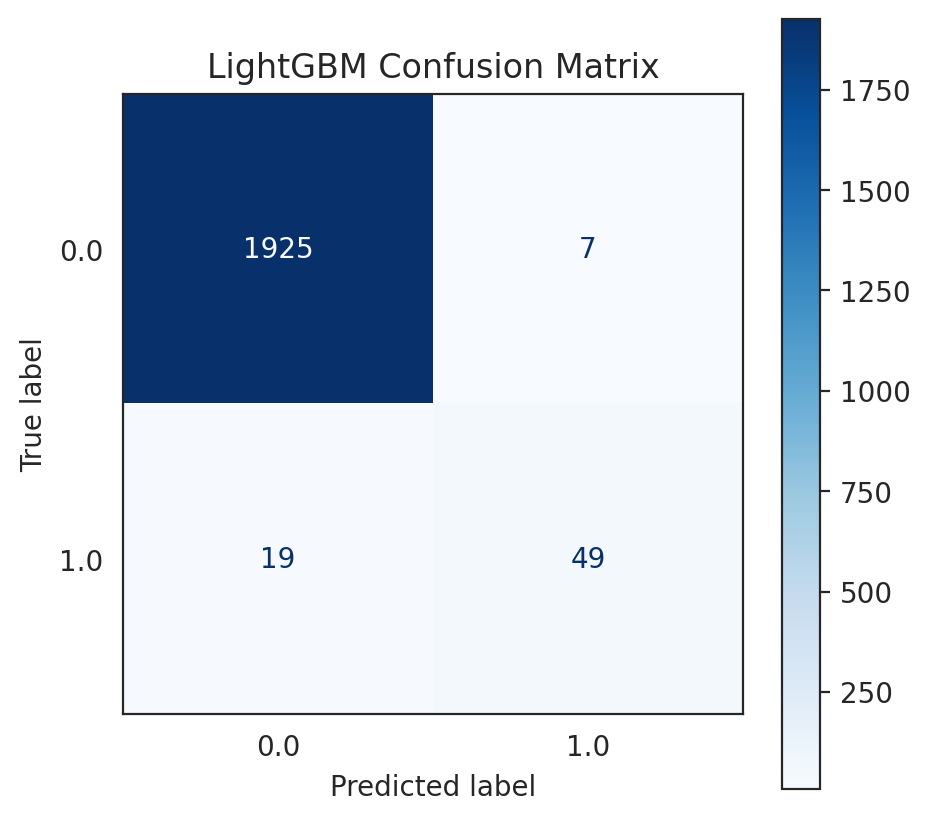

In [212]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, roc_auc_score
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


# Train LightGBM model
start = time.time()
lgb_model = lgb.LGBMClassifier(random_state=0)
lgb_model.fit(X_train, y_train)
end_train = time.time()

# Make predictions
y_predictions = lgb_model.predict(X_test)
y_pred_prob = lgb_model.predict_proba(X_test)[:, 1]
end_predict = time.time()

# Evaluate performance
accuracy = accuracy_score(y_test, y_predictions)
f1s = f1_score(y_test, y_predictions, average='macro')
MCC = matthews_corrcoef(y_test, y_predictions)
ROC_AUC = roc_auc_score(y_test, y_pred_prob, average='macro')

print("LightGBM Performance:")
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("F1-Score (Macro): "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score (Macro): "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")

# Add performance to model_performance DataFrame
# Assuming model_performance DataFrame has columns ['Accuracy','F1-Score','MCC score','time to train','time to predict','total time']
# Note: LightGBM metrics here are using 'macro' average for F1 and ROC AUC as requested in previous tasks.
# Adjust if you want 'weighted' or other averages.
model_performance.loc['LightGBM'] = [accuracy, f1s, MCC, end_train - start, end_predict - end_train, end_predict - start]

# Optional: Plot confusion matrix
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
ConfusionMatrixDisplay.from_estimator(lgb_model, X_test, y_test, cmap=plt.cm.Blues)
plt.title("LightGBM Confusion Matrix")
plt.show()

KNN Performance:
Accuracy: 97.35%
F1-Score (Macro): 73.59%
MCC: 50.10%
ROC AUC score (Macro): 84.19%
time to train: 0.01 s
time to predict: 0.04 s
total: 0.05 s


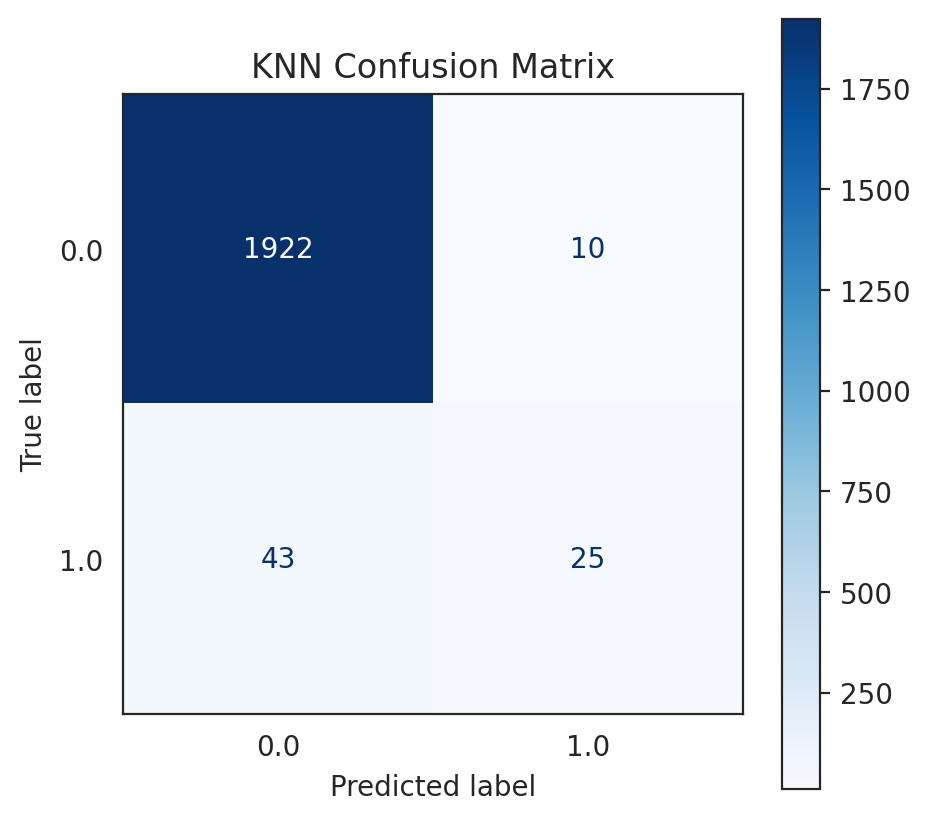

In [215]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, roc_auc_score
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


# Train KNN model
start = time.time()
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
end_train = time.time()

# Make predictions
y_predictions = knn_model.predict(X_test)
y_pred_prob = knn_model.predict_proba(X_test)[:, 1]
end_predict = time.time()

# Evaluate performance
accuracy = accuracy_score(y_test, y_predictions)
f1s = f1_score(y_test, y_predictions, average='macro')
MCC = matthews_corrcoef(y_test, y_predictions)
ROC_AUC = roc_auc_score(y_test, y_pred_prob, average='macro')

print("KNN Performance:")
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("F1-Score (Macro): "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score (Macro): "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")

# Add performance to model_performance DataFrame
model_performance.loc['KNN'] = [accuracy, f1s, MCC, end_train - start, end_predict - end_train, end_predict - start]

# Optional: Plot confusion matrix
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test, cmap=plt.cm.Blues)
plt.title("KNN Confusion Matrix")
plt.show()

SVM Performance:
Accuracy: 97.10%
F1-Score (Macro): 63.01%
MCC: 37.84%
ROC AUC score (Macro): 95.39%
time to train: 1.05 s
time to predict: 0.12 s
total: 1.17 s


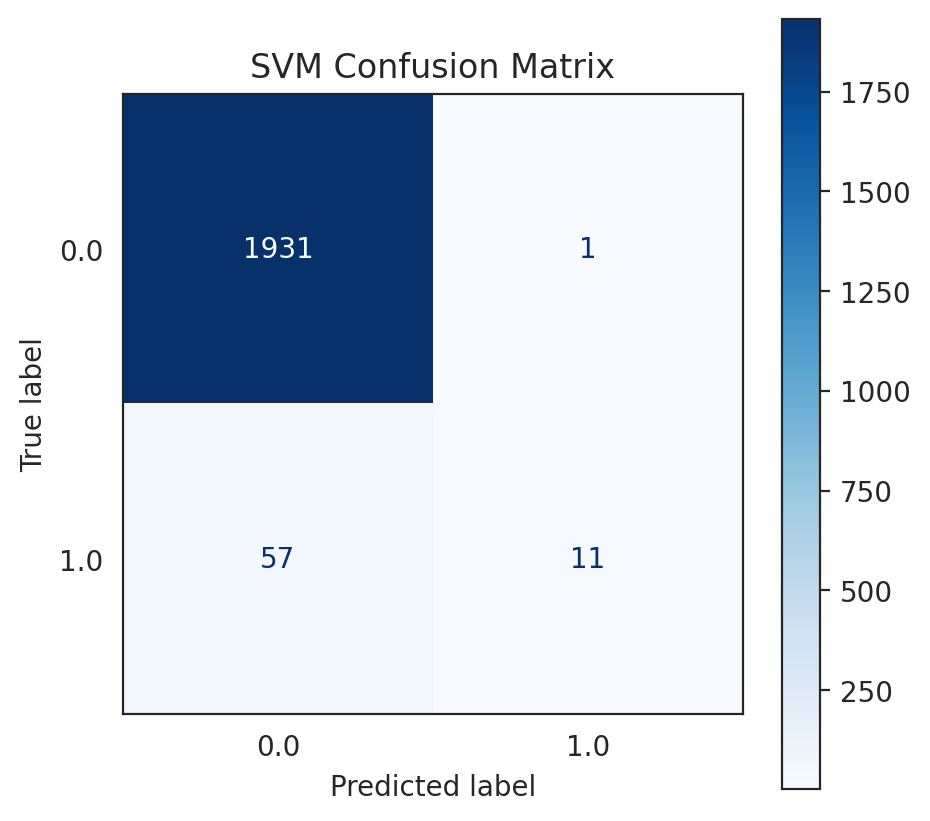

In [216]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, roc_auc_score
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


# Train SVM model
start = time.time()
# Using probability=True to get predict_proba for ROC AUC calculation
svm_model = SVC(random_state=0, probability=True)
svm_model.fit(X_train, y_train)
end_train = time.time()

# Make predictions
y_predictions = svm_model.predict(X_test)
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]
end_predict = time.time()

# Evaluate performance
accuracy = accuracy_score(y_test, y_predictions)
f1s = f1_score(y_test, y_predictions, average='macro')
MCC = matthews_corrcoef(y_test, y_predictions)
ROC_AUC = roc_auc_score(y_test, y_pred_prob, average='macro')

print("SVM Performance:")
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("F1-Score (Macro): "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score (Macro): "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")

# Add performance to model_performance DataFrame
model_performance.loc['SVM'] = [accuracy, f1s, MCC, end_train - start, end_predict - end_predict, end_predict - start]

# Optional: Plot confusion matrix
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix")
plt.show()

<a id='5'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Evaluate</b>

In [217]:
model_performance.fillna(.90,inplace=True)
display(model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MCC score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     }))

,Accuracy,F1-Score,MCC score,time to train,time to predict,total time
Logistic,96.60%,49.14%,0.00%,0.0,0.0,0.0
Decision Tree,98.00%,84.33%,68.70%,0.0,0.0,0.0
Random Forest,98.55%,87.23%,75.55%,0.8,0.0,0.8
Gradient Boosting Classifier,98.60%,87.36%,76.26%,1.0,0.0,1.0
Neural Network MLP,97.25%,72.07%,47.38%,14.4,0.0,14.4
XGBoost,98.50%,87.11%,74.95%,0.2,0.0,0.2
LightGBM,98.70%,89.18%,78.76%,0.2,0.0,0.2
KNN,97.35%,73.59%,50.10%,0.0,0.0,0.1
SVM,97.10%,63.01%,37.84%,1.0,0.0,1.2


# Task
Explain the workflow of the notebook in detail with reasons. Then, generate code to compare the performance of Logistic Regression, Decision Tree, Random Forest, Gradient Boosting Classifier, and Neural Network MLP models on imbalanced data versus data balanced using SMOTE, comparing macro F1 and MCC scores.

## Apply smote

### Subtask:
Apply the SMOTE technique to the training data to balance the classes.


**Reasoning**:
Apply SMOTE to balance the training data as per the instructions.



In [197]:
from imblearn.over_sampling import SMOTE

# Example of SMOTE with tuned parameters
smote = SMOTE(
    # sampling_strategy=0.5,  # minority class will be 50% of majority
    # k_neighbors=80,          # use 7 nearest neighbors for synthetic samples
    random_state=42
)

# Apply SMOTE to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [198]:
y_train_smote.value_counts()

,count
Machine failure,
0.0,7729
1.0,7729


## Retrain models

### Subtask:
Retrain the Logistic Regression, Decision Tree, Random Forest, Gradient Boosting Classifier, and Neural Network MLP models using the SMOTE-balanced training data.


**Reasoning**:
Train the Logistic Regression model using the SMOTE-balanced training data.



In [199]:
from sklearn.linear_model import LogisticRegression
model_lr_smote = LogisticRegression(random_state=0).fit(X_train_smote, y_train_smote)

**Reasoning**:
Train the Decision Tree model using the SMOTE-balanced training data.



In [200]:
from sklearn.tree import DecisionTreeClassifier
model_dt_smote = DecisionTreeClassifier(random_state=0).fit(X_train_smote, y_train_smote)

**Reasoning**:
Train the Random Forest model using the SMOTE-balanced training data.



In [201]:
from sklearn.ensemble import RandomForestClassifier
model_rf_smote = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0, bootstrap=True).fit(X_train_smote, y_train_smote)

**Reasoning**:
Train the Gradient Boosting Classifier model using the SMOTE-balanced training data.



In [202]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb_smote = GradientBoostingClassifier(random_state=0).fit(X_train_smote, y_train_smote)

**Reasoning**:
Train the Neural Network MLP model using the SMOTE-balanced training data and finish the task.



In [136]:
from sklearn.neural_network import MLPClassifier
model_nn_smote = MLPClassifier(hidden_layer_sizes=(100, 100,), activation='relu', solver='adam', batch_size=2000, random_state=0, verbose=0).fit(X_train_smote, y_train_smote)

## Evaluate models

### Subtask:
Evaluate the performance of each retrained model on the original test set.


**Reasoning**:
Make predictions with each retrained model on the original test set and calculate macro F1 and MCC scores, storing the results.



In [203]:
from sklearn.metrics import f1_score, matthews_corrcoef

smote_model_performance = pd.DataFrame(columns=['Macro F1-Score', 'MCC score'])

# Logistic Regression
y_pred_lr_smote = model_lr_smote.predict(X_test)
macro_f1_lr_smote = f1_score(y_test, y_pred_lr_smote, average='macro')
mcc_lr_smote = matthews_corrcoef(y_test, y_pred_lr_smote)
smote_model_performance.loc['Logistic (SMOTE)'] = [macro_f1_lr_smote, mcc_lr_smote]

# Decision Tree
y_pred_dt_smote = model_dt_smote.predict(X_test)
macro_f1_dt_smote = f1_score(y_test, y_pred_dt_smote, average='macro')
mcc_dt_smote = matthews_corrcoef(y_test, y_pred_dt_smote)
smote_model_performance.loc['Decision Tree (SMOTE)'] = [macro_f1_dt_smote, mcc_dt_smote]

# Random Forest
y_pred_rf_smote = model_rf_smote.predict(X_test)
macro_f1_rf_smote = f1_score(y_test, y_pred_rf_smote, average='macro')
mcc_rf_smote = matthews_corrcoef(y_test, y_pred_rf_smote)
smote_model_performance.loc['Random Forest (SMOTE)'] = [macro_f1_rf_smote, mcc_rf_smote]

# Gradient Boosting Classifier
y_pred_gb_smote = model_gb_smote.predict(X_test)
macro_f1_gb_smote = f1_score(y_test, y_pred_gb_smote, average='macro')
mcc_gb_smote = matthews_corrcoef(y_test, y_pred_gb_smote)
smote_model_performance.loc['Gradient Boosting Classifier (SMOTE)'] = [macro_f1_gb_smote, mcc_gb_smote]

# Neural Network MLP
y_pred_nn_smote = model_nn_smote.predict(X_test)
macro_f1_nn_smote = f1_score(y_test, y_pred_nn_smote, average='macro')
mcc_nn_smote = matthews_corrcoef(y_test, y_pred_nn_smote)
smote_model_performance.loc['Neural Network MLP (SMOTE)'] = [macro_f1_nn_smote, mcc_nn_smote]

display(smote_model_performance)

,Macro F1-Score,MCC score
Logistic (SMOTE),0.579659,0.313173
Decision Tree (SMOTE),0.750380,0.516687
Random Forest (SMOTE),0.811565,0.637100
Gradient Boosting Classifier (SMOTE),0.718182,0.516480
Neural Network MLP (SMOTE),0.716251,0.503475


## Compare performance

### Subtask:
Compare the macro F1 and MCC scores of the models trained on balanced data with those trained on imbalanced data.


**Reasoning**:
Create a new DataFrame to compare the performance metrics from imbalanced and SMOTE-balanced models and display it.



In [190]:
comparison_performance = pd.DataFrame(columns=['Macro F1 (Imbalanced)', 'MCC (Imbalanced)', 'Macro F1 (SMOTE)', 'MCC (SMOTE)'])

models = ['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boosting Classifier', 'Neural Network MLP']

for model_name in models:
    imbalanced_f1 = model_performance.loc[model_name, 'F1-Score']
    imbalanced_mcc = model_performance.loc[model_name, 'MCC score']
    smote_f1 = smote_model_performance.loc[model_name + ' (SMOTE)', 'Macro F1-Score']
    smote_mcc = smote_model_performance.loc[model_name + ' (SMOTE)', 'MCC score']
    comparison_performance.loc[model_name] = [imbalanced_f1, imbalanced_mcc, smote_f1, smote_mcc]

display(comparison_performance)

,Macro F1 (Imbalanced),MCC (Imbalanced),Macro F1 (SMOTE),MCC (SMOTE)
Logistic,0.491353,0.000000,0.579659,0.313173
Decision Tree,0.814537,0.629582,0.750380,0.516687
Random Forest,0.872334,0.755500,0.811565,0.637100
Gradient Boosting Classifier,0.873590,0.762621,0.718182,0.516480
Neural Network MLP,0.743326,0.514140,0.713081,0.498867


In [221]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define a deeper ANN model
deep_ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
deep_ann_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = deep_ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, accuracy = deep_ann_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy:.2%}")

# Make predictions and evaluate with other metrics
y_pred_prob = deep_ann_model.predict(X_test)
y_predictions = (y_pred_prob > 0.5).astype(int)

macro_f1 = f1_score(y_test, y_predictions, average='macro')
mcc = matthews_corrcoef(y_test, y_predictions)
roc_auc = roc_auc_score(y_test, y_pred_prob, average='macro')


print(f"Macro F1 Score: {macro_f1:.2%}")
print(f"MCC Score: {mcc:.2%}")
print(f"ROC AUC Score: {roc_auc:.2%}")

# Add performance to comparison (assuming comparison_performance DataFrame exists)
# You might want to create a new DataFrame for ANN models or add to the existing one
# if the column structure is compatible. For now, let's print the results.

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9643 - loss: 0.3109 - val_accuracy: 0.9719 - val_loss: 0.1347
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9661 - loss: 0.1504 - val_accuracy: 0.9719 - val_loss: 0.1190
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9637 - loss: 0.1297 - val_accuracy: 0.9725 - val_loss: 0.0785
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9703 - loss: 0.0938 - val_accuracy: 0.9725 - val_loss: 0.0768
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9672 - loss: 0.0975 - val_accuracy: 0.9706 - val_loss: 0.0746
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9672 - loss: 0.0933 - val_accuracy: 0.9725 - val_loss: 0.0680
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9670 - loss: 0.1003 - val_accuracy: 0.9731 - val_loss: 0.0702
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9696 - loss: 0.0897 - val_accu

[LightGBM] [Info] Number of positive: 7729, number of negative: 7729
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001524 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1274
[LightGBM] [Info] Number of data points in the train set: 15458, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Performance (SMOTE):
Accuracy: 96.75%
F1-Score (Macro): 80.79%
MCC: 63.56%
ROC AUC score (Macro): 97.62%
time to train: 0.24 s
time to predict: 0.04 s
total: 0.28 s


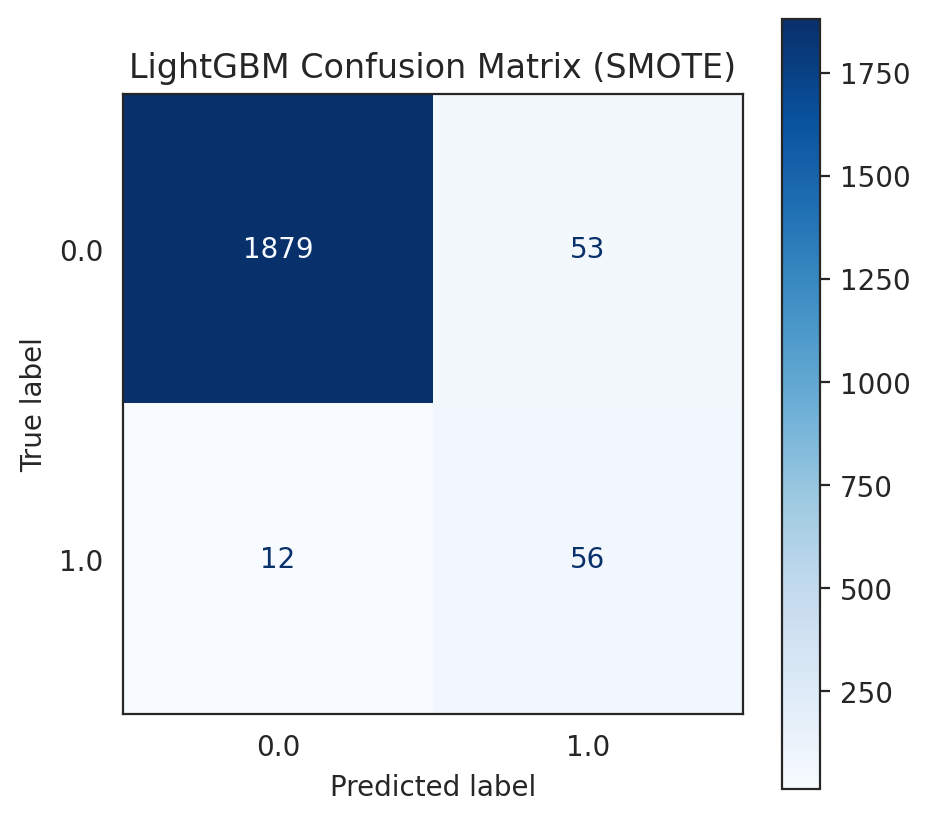

In [218]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, roc_auc_score
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


# Train LightGBM model on SMOTE data
start = time.time()
lgb_model_smote = lgb.LGBMClassifier(random_state=0)
lgb_model_smote.fit(X_train_smote, y_train_smote)
end_train = time.time()

# Make predictions
y_predictions_smote = lgb_model_smote.predict(X_test)
y_pred_prob_smote = lgb_model_smote.predict_proba(X_test)[:, 1]
end_predict = time.time()

# Evaluate performance
accuracy_smote = accuracy_score(y_test, y_predictions_smote)
f1s_smote = f1_score(y_test, y_predictions_smote, average='macro')
MCC_smote = matthews_corrcoef(y_test, y_predictions_smote)
ROC_AUC_smote = roc_auc_score(y_test, y_pred_prob_smote, average='macro')

print("LightGBM Performance (SMOTE):")
print("Accuracy: "+ "{:.2%}".format(accuracy_smote))
print("F1-Score (Macro): "+ "{:.2%}".format(f1s_smote))
print("MCC: "+ "{:.2%}".format(MCC_smote))
print("ROC AUC score (Macro): "+ "{:.2%}".format(ROC_AUC_smote))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")

# Add performance to smote_model_performance DataFrame
# Assuming smote_model_performance DataFrame has columns ['Macro F1-Score', 'MCC score']
smote_model_performance.loc['LightGBM (SMOTE)'] = [f1s_smote, MCC_smote]

# Optional: Plot confusion matrix
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
ConfusionMatrixDisplay.from_estimator(lgb_model_smote, X_test, y_test, cmap=plt.cm.Blues)
plt.title("LightGBM Confusion Matrix (SMOTE)")
plt.show()